# Python notebooks

Python **notebooks** are another format for Python code. So far we've seen:

- the Python console (good for quick experimentation)
- writing scripts or modules, e.g. in PyCharm (good for developing more complicated projects)

Python notebooks are an intermediate form, intended for interactive data analysis

- the [IPython notebook web page](http://ipython.org/notebook.html) ("an agile tool for both exploratory computation and data analysis")
- [examples](http://nbviewer.jupyter.org/github/ipython/ipython/blob/2.x/examples/Index.ipynb)

basic protocol:

- edit in web browser
- save as `.ipynb` file
- export as HTML


In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
def SIR_grad(x,t,params):
   """basic gradient definitions for SIR model"""
   beta,gamma = params   ## unpack parameters
   S,I,R = x             ## unpack state variables
   return(np.array([-beta*S*I, beta*S*I-gamma*I, gamma*I]))

In [3]:
t_vec = np.arange(0,15,step=0.1)
SIR_sol2 = scipy.integrate.odeint(SIR_grad,
                       y0=(0.99,0.01,0),
                       t=t_vec,
                       args=((2,1),))

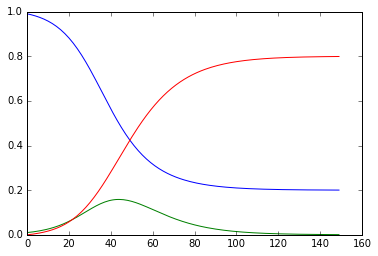

In [4]:
%matplotlib inline
fig, ax = plt.subplots()
## use semicolon to suppress output (<Lines2D> etc.; http://bit.ly/1PFZ2yW)
ax.plot(SIR_sol2);

Now we'll do a few more interesting (?) things with the SIR model

## Vital dynamics

We'll allow for birth and death, so the equations become

$$
\begin{split}
\frac{dS}{dt} & = b - \beta S I  \phantom{- \gamma I} - \mu S \\
\frac{dI}{dt} & = \phantom{b -} \beta S I - \gamma I - \mu I\\
\frac{dR}{dt} & = \phantom{b - \beta S I} + \gamma I - \mu R
\end{split}
$$


In [5]:
def SIR_grad_bd(x,t,params):
   """SIR model with vital dynamics (birth and death)"""
   beta,gamma,b,mu = params
   S,I,R = x
   return(np.array([b-beta*S*I-mu*S, beta*S*I-gamma*I-mu*I, gamma*I-mu*R]))

In [6]:
t_vec2 = np.arange(0,150,step=0.1)
SIR_sol_bd = scipy.integrate.odeint(SIR_grad_bd,
                       y0=(0.99,0.01,0),
                       t=t_vec2,
                       args=((2,1,0.05,0.05),))

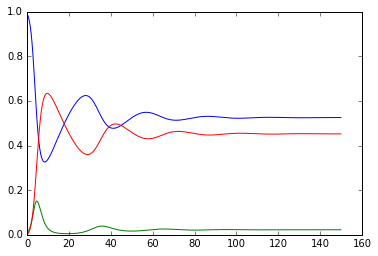

In [7]:
fig, ax = plt.subplots()
ax.plot(t_vec2,SIR_sol_bd);

## Seasonality

What if we additionally add sinusoidal variation to the epidemic? (This makes the ODEs *non-autonomous*, i.e. the gradients depend directly on time as well as on the values of the state variables.) Let's make $\beta(t) = \beta_0 ( 1 + \delta \sin(2\pi t/\tau))$.

In [8]:
def SIR_grad_bd_seas(x,t,params):
   """SIR model with vital dynamics (birth and death) and seasonality"""
   beta0,gamma,b,mu,delta,tau = params
   S,I,R = x
   beta = beta0*(1+delta*np.cos(2*np.pi*t/tau))
   return(np.array([b-beta*S*I-mu*S, beta*S*I-gamma*I-mu*I, gamma*I-mu*R]))

In [9]:
t_vec3 = np.arange(0,800,step=1) ## run for even longer
SIR_sol_bd_seas = scipy.integrate.odeint(SIR_grad_bd_seas,
                       y0=(0.99,0.01,0),
                       t=t_vec3,
                       args=((2,1,0.02,0.02,0.2,20),))

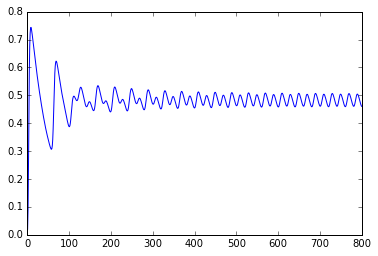

In [10]:
fig, ax = plt.subplots()
ax.plot(t_vec3,SIR_sol_bd_seas[:,2]);